# 데이터 시각화 실습
- 데이터 - 지자체별 문화 예산 정보 (한국문화예술위원회)
- 링크 : https://www.culture.go.kr/bigdata/user/data_market/detail.do?id=ad074b60-6ef6-11ed-b3ef-49efc94461a7 
## 시각화 내용
1.   ChartData - 서울시 기준 2016 ~ 2022년 문화관광예산금액 차이 확인
2.   ChartData - 지방자치단체 기준 지자체별 2016 ~ 2022년 1인당문화관광예산금액 차이 확인 
3. ChartData - 광역자치단체별 2016 ~ 2022년 문화관광예산금액 차이 확인

4. ChartData - 2016, 2018, 2020, 2022년의 지자체별 문화관광예산현황 비교
5. PieChart - 각 지방자치단체별 2020년 문화관광예산금액  
6. Boxplot - 2016년과 2022년 문화관광예산금액
7. Boxplot - 2018년과 2020년 1인당문화관광예산금액
8. Histogram - 문화관광예산금액 히스토그램 
9. Histogram - 1인당 문화관광예산금액 히스토그램 
10. Scatterplot -  문화관광예산금액과 1인당 문화관광예산금액 산점도
11. Scatterplot -  년도별 문화관광예산금액과 1인당 문화관광예산금액 산점도
12. Scatterplot - 문화관광예산금액과 1인당 문화관광예산금액 Rug plot과 산점도
13. countplot - 연도에 따른 countplot
14. jointplot - 문화관광예산금액과 1인당문화관광예산금액 jointplot
15. pairplot - pairplot 제작
16. Heatmap  - Heatmap 제작

# 준비하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='AppleGothic')

In [3]:
CHART_NAME = 'seabornTest'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

# 데이터 불러오기

In [4]:
filename = '/Users/seohuiwon/Desktop/School/2023/pythonpratice/DataVisualization/Data/지자체별문화예산정보.csv'

df= pd.read_csv(filename, encoding='utf-8', index_col = 0 )

In [5]:
df

,FINAN_YEAR,ADMNSTMACH_CD,ADMNSTMACH_NM,TOT_ANEXPTR_BUDGET_PRICE,BEFORE_YEAR_ANEXPTR_BUDGET_PRICE,ANEXPTR_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_PRICE,BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE,CLTUR_TURSM_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_RATE,TOT_POPLTN_CO,ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE
SEQ_NO,,,,,,,,,,,,
1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 1 to 1704
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FINAN_YEAR                            1704 non-null   int64  
 1   ADMNSTMACH_CD                         1704 non-null   int64  
 2   ADMNSTMACH_NM                         1704 non-null   object 
 3   TOT_ANEXPTR_BUDGET_PRICE              1701 non-null   float64
 4   BEFORE_YEAR_ANEXPTR_BUDGET_PRICE      1701 non-null   float64
 5   ANEXPTR_BUDGET_IRDS_RT                1701 non-null   float64
 6   CLTUR_TURSM_BUDGET_PRICE              1701 non-null   float64
 7   BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE  1701 non-null   float64
 8   CLTUR_TURSM_BUDGET_IRDS_RT            1647 non-null   float64
 9   CLTUR_TURSM_BUDGET_RATE               1701 non-null   float64
 10  TOT_POPLTN_CO                         1704 non-null   int64  
 11  ONE_PSNBY_CLTUR_T

In [7]:
df.columns = ['회계년도', '행정기관코드', '행정기관명', '총세출예산금액', '이전년도세출예산금액', '세출예산증감율', 
              '문화관광예산금액', '이전년도문화관광예산금액', '문화관광예산증감율', '문화관광예산비율',
              '총인구수', '1인당문화관광예산금액']

In [8]:
df

,회계년도,행정기관코드,행정기관명,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
SEQ_NO,,,,,,,,,,,,
1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 1 to 1704
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회계년도          1704 non-null   int64  
 1   행정기관코드        1704 non-null   int64  
 2   행정기관명         1704 non-null   object 
 3   총세출예산금액       1701 non-null   float64
 4   이전년도세출예산금액    1701 non-null   float64
 5   세출예산증감율       1701 non-null   float64
 6   문화관광예산금액      1701 non-null   float64
 7   이전년도문화관광예산금액  1701 non-null   float64
 8   문화관광예산증감율     1647 non-null   float64
 9   문화관광예산비율      1701 non-null   float64
 10  총인구수          1704 non-null   int64  
 11  1인당문화관광예산금액   1701 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 173.1+ KB


In [10]:
df.describe()

,회계년도,행정기관코드,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
count,1704.000000,1.704000e+03,1.701000e+03,1.701000e+03,1701.000000,1.701000e+03,1.701000e+03,1647.000000,1701.000000,1.704000e+03,1701.000000
mean,2018.996479,3.750868e+09,1.424296e+12,1.309889e+12,9.042369,3.776337e+09,3.494851e+09,130.685149,0.241052,4.213810e+05,17638.746032
std,2.000584,1.158620e+09,3.536369e+12,3.241858e+12,7.959600,1.073771e+10,9.977372e+09,1242.245240,0.381225,1.122450e+06,34411.927341
min,2016.000000,1.100000e+09,1.360640e+11,1.251405e+11,-18.810000,0.000000e+00,0.000000e+00,-100.000000,0.000000,1.000100e+04,0.000000
25%,2017.000000,2.826000e+09,4.244581e+11,3.929248e+11,4.440000,2.306160e+08,1.993000e+08,-29.355000,0.040000,5.700500e+04,1272.000000
50%,2019.000000,4.223000e+09,5.993328e+11,5.499369e+11,8.530000,8.400000e+08,7.489600e+08,8.440000,0.120000,1.707880e+05,5711.000000
75%,2021.000000,4.671000e+09,9.735806e+11,8.940363e+11,12.540000,2.244900e+09,2.031630e+09,68.930000,0.290000,3.798920e+05,20170.000000
max,2022.000000,5.000000e+09,4.772111e+13,4.199913e+13,126.930000,1.201865e+11,9.901546e+10,45776.870000,3.740000,1.271678e+07,403771.000000


In [11]:
df_raw = df

# 실습

## ChartData

### 1. ChartData - 서울시 기준 2016 ~ 2022년 문화관광예산금액 차이 확인

In [12]:
df2 = df[['회계년도', '행정기관명', '문화관광예산금액']]

In [13]:
df2

,회계년도,행정기관명,문화관광예산금액
SEQ_NO,,,
1,2016,서울특별시,5.632196e+10
2,2016,서울특별시 종로구,3.850000e+08
3,2016,서울특별시 중구,1.384890e+08
4,2016,서울특별시 용산구,2.170000e+07
5,2016,서울특별시 성동구,4.600000e+07
...,...,...,...
1700,2022,경상남도 산청군,3.140200e+09
1701,2022,경상남도 함양군,6.944940e+08
1702,2022,경상남도 거창군,3.005200e+08


In [14]:
print(df2.columns)

Index(['회계년도', '행정기관명', '문화관광예산금액'], dtype='object')


In [15]:
dff = df2[(df2['행정기관명'] == '서울특별시')]  

In [16]:
dff.set_index('회계년도', inplace = True)

In [17]:
chartdata = dff[['문화관광예산금액']]

Text(0.5, 1.0, '2016~2022년 서울시 문화관광예산금액')

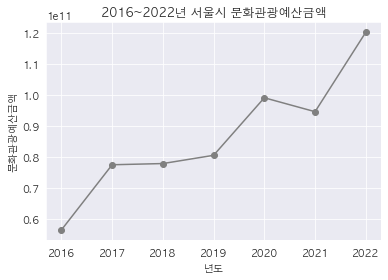

In [18]:
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
plt.plot(chartdata, color='gray', linestyle='solid', marker='o')
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel("문화관광예산금액")
plt.title('2016~2022년 서울시 문화관광예산금액')

### 2. ChartData - 지방자치단체 기준 지자체별 2016 ~ 2022년 1인당문화관광예산금액 차이 확인 

In [19]:
df3 = df[['1인당문화관광예산금액', '회계년도', '행정기관명']]

In [20]:
df3.set_index('회계년도', inplace = True)

In [21]:
df3

,1인당문화관광예산금액,행정기관명
회계년도,,
2016,5714.0,서울특별시
2016,2521.0,서울특별시 종로구
2016,1106.0,서울특별시 중구
2016,94.0,서울특별시 용산구
2016,154.0,서울특별시 성동구
...,...,...
2022,86991.0,경상남도 산청군
2022,17258.0,경상남도 함양군
2022,4747.0,경상남도 거창군


In [22]:
df3['행정기관명'].value_counts()

서울특별시          7
충청남도 당진시       7
충청남도 부여군       7
충청남도 서천군       7
충청남도 청양군       7
              ..
경기도 부천시        7
경기도 광명시        7
경기도 용인시 처인구    1
경기도 용인시 기흥구    1
경기도 용인시 수지구    1
Name: 행정기관명, Length: 246, dtype: int64

In [23]:
data1 = df3[(df3['행정기관명'] == '서울특별시')]
seoul = data1[['1인당문화관광예산금액']]
seoul.rename(columns = {'1인당문화관광예산금액':'서울특별시'}, inplace = True)

data2 = df3[(df3['행정기관명'] == '경기도')]
ggi = data2[['1인당문화관광예산금액']]
ggi.rename(columns = {'1인당문화관광예산금액':'경기도'}, inplace = True)

data3 = df3[(df3['행정기관명'] == '인천광역시')]
ich = data3[['1인당문화관광예산금액']]
ich.rename(columns = {'1인당문화관광예산금액':'인천광역시'}, inplace = True)

data4 = df3[(df3['행정기관명'] == '부산광역시')]
busan = data4[['1인당문화관광예산금액']]
busan.rename(columns = {'1인당문화관광예산금액':'부산광역시'}, inplace = True)

data5 = df3[(df3['행정기관명'] == '울산광역시')]
ulsan = data5[['1인당문화관광예산금액']]
ulsan.rename(columns = {'1인당문화관광예산금액':'울산광역시'}, inplace = True)

data6 = df3[(df3['행정기관명'] == '대전광역시')]
daejeon = data6[['1인당문화관광예산금액']]
daejeon.rename(columns = {'1인당문화관광예산금액':'대전광역시'}, inplace = True)

data7 = df3[(df3['행정기관명'] == '세종특별자치시')]
saejong = data7[['1인당문화관광예산금액']]
saejong.rename(columns = {'1인당문화관광예산금액':'세종특별자치시'}, inplace = True)

data8 = df3[(df3['행정기관명'] == '제주특별자치도')]
jeju = data8[['1인당문화관광예산금액']]
jeju.rename(columns = {'1인당문화관광예산금액':'제주특별자치도'}, inplace = True)

data9 = df3[(df3['행정기관명'] == '전라북도')]
jeonup = data9[['1인당문화관광예산금액']]
jeonup.rename(columns = {'1인당문화관광예산금액':'전라북도'}, inplace = True)

data10 = df3[(df3['행정기관명'] == '전라남도')]
jeondown = data10[['1인당문화관광예산금액']]
jeondown.rename(columns = {'1인당문화관광예산금액':'전라남도'}, inplace = True)

data11 = df3[(df3['행정기관명'] == '충청북도')]
chungup = data11[['1인당문화관광예산금액']]
chungup.rename(columns = {'1인당문화관광예산금액': '충청북도'}, inplace = True)

data12 = df3[(df3['행정기관명'] == '충청남도')]
chungdown = data12[['1인당문화관광예산금액']]
chungdown.rename(columns = {'1인당문화관광예산금액':'충청남도'}, inplace = True)

data13 = df3[(df3['행정기관명'] == '경상북도')]
sangup = data13[['1인당문화관광예산금액']]
sangup.rename(columns = {'1인당문화관광예산금액':'경상북도'}, inplace = True)

data14 = df3[(df3['행정기관명'] == '경상남도')]
sangdown = data14[['1인당문화관광예산금액']]
sangdown.rename(columns = {'1인당문화관광예산금액':'경상남도'}, inplace = True)

/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2281108025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.rename(columns = {'1인당문화관광예산금액':'서울특별시'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2281108025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggi.rename(columns = {'1인당문화관광예산금액':'경기도'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2281108025.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [24]:
chartdata_1 = pd.concat([seoul, ggi, ich, busan, ulsan, daejeon, saejong,  jeju, jeonup , jeondown ,chungup, chungdown, sangup, sangdown], axis = 1)

In [25]:
chartdata_1

,서울특별시,경기도,인천광역시,부산광역시,울산광역시,대전광역시,세종특별자치시,제주특별자치도,전라북도,전라남도,충청북도,충청남도,경상북도,경상남도
회계년도,,,,,,,,,,,,,,
2016,5714.0,2714.0,2674.0,5093.0,4541.0,1824.0,5266.0,31973.0,16138.0,21561.0,11371.0,21645.0,28567.0,8780.0
2017,7849.0,3301.0,2057.0,7251.0,4408.0,1391.0,3532.0,29906.0,18341.0,16744.0,6429.0,34802.0,26255.0,8483.0
2018,7889.0,3757.0,2710.0,2690.0,3391.0,1708.0,12204.0,25657.0,20737.0,21794.0,8063.0,25912.0,19619.0,8721.0
2019,8159.0,3954.0,2824.0,2978.0,8291.0,2100.0,5171.0,31496.0,23199.0,26792.0,6115.0,24274.0,27092.0,13952.0
2020,10045.0,6343.0,1397.0,2660.0,10725.0,3961.0,12280.0,31147.0,20028.0,26606.0,11428.0,28059.0,25739.0,18455.0
2021,9589.0,5081.0,1829.0,3016.0,9490.0,6389.0,20170.0,27224.0,26048.0,22747.0,13664.0,33172.0,27631.0,19655.0
2022,12192.0,4870.0,2455.0,4954.0,10437.0,2121.0,8022.0,28855.0,36078.0,24228.0,10936.0,33218.0,26449.0,13949.0


Text(0.5, 1.0, '광역자치단체별 2016 ~ 2022년 문화관광예산금액')

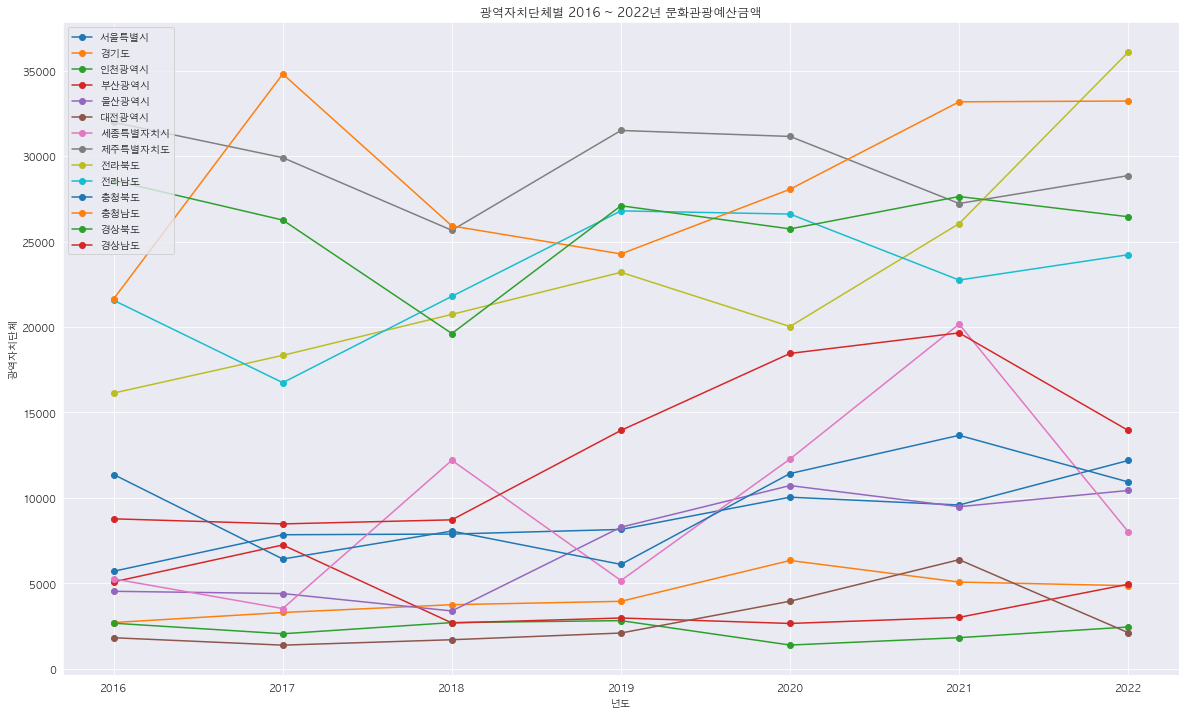

In [26]:
chartdata_1.plot(title='SomeTitie', figsize=(20,12), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel('광역자치단체')
plt.title('광역자치단체별 2016 ~ 2022년 문화관광예산금액')


### 3. ChartData - 광역자치단체별 2016 ~ 2022년 문화관광예산금액 차이 확인 - 코드 파이참에서 옮기기



In [27]:
df3 = df[['회계년도', '행정기관명', '문화관광예산금액']]

In [28]:
df3.set_index('회계년도', inplace = True)

In [29]:
df3

,행정기관명,문화관광예산금액
회계년도,,
2016,서울특별시,5.632196e+10
2016,서울특별시 종로구,3.850000e+08
2016,서울특별시 중구,1.384890e+08
2016,서울특별시 용산구,2.170000e+07
2016,서울특별시 성동구,4.600000e+07
...,...,...
2022,경상남도 산청군,3.140200e+09
2022,경상남도 함양군,6.944940e+08
2022,경상남도 거창군,3.005200e+08


In [30]:
df3['행정기관명'].value_counts()

서울특별시          7
충청남도 당진시       7
충청남도 부여군       7
충청남도 서천군       7
충청남도 청양군       7
              ..
경기도 부천시        7
경기도 광명시        7
경기도 용인시 처인구    1
경기도 용인시 기흥구    1
경기도 용인시 수지구    1
Name: 행정기관명, Length: 246, dtype: int64

In [31]:
data1 = df3[(df3['행정기관명'] == '서울특별시')]
seoul = data1[['문화관광예산금액']]
seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)

data2 = df3[(df3['행정기관명'] == '경기도')]
ggi = data2[['문화관광예산금액']]
ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)

data3 = df3[(df3['행정기관명'] == '인천광역시')]
ich = data3[['문화관광예산금액']]
ich.rename(columns = {'문화관광예산금액':'인천광역시'}, inplace = True)

data4 = df3[(df3['행정기관명'] == '부산광역시')]
busan = data4[['문화관광예산금액']]
busan.rename(columns = {'문화관광예산금액':'부산광역시'}, inplace = True)

data5 = df3[(df3['행정기관명'] == '울산광역시')]
ulsan = data5[['문화관광예산금액']]
ulsan.rename(columns = {'문화관광예산금액':'울산광역시'}, inplace = True)

data6 = df3[(df3['행정기관명'] == '대전광역시')]
daejeon = data6[['문화관광예산금액']]
daejeon.rename(columns = {'문화관광예산금액':'대전광역시'}, inplace = True)

data7 = df3[(df3['행정기관명'] == '세종특별자치시')]
saejong = data7[['문화관광예산금액']]
saejong.rename(columns = {'문화관광예산금액':'세종특별자치시'}, inplace = True)

data8 = df3[(df3['행정기관명'] == '제주특별자치도')]
jeju = data8[['문화관광예산금액']]
jeju.rename(columns = {'문화관광예산금액':'제주특별자치도'}, inplace = True)

data9 = df3[(df3['행정기관명'] == '전라북도')]
jeonup = data9[['문화관광예산금액']]
jeonup.rename(columns = {'문화관광예산금액':'전라북도'}, inplace = True)

data10 = df3[(df3['행정기관명'] == '전라남도')]
jeondown = data10[['문화관광예산금액']]
jeondown.rename(columns = {'문화관광예산금액':'전라남도'}, inplace = True)

data11 = df3[(df3['행정기관명'] == '충청북도')]
chungup = data11[['문화관광예산금액']]
chungup.rename(columns = {'문화관광예산금액': '충청북도'}, inplace = True)

data12 = df3[(df3['행정기관명'] == '충청남도')]
chungdown = data12[['문화관광예산금액']]
chungdown.rename(columns = {'문화관광예산금액':'충청남도'}, inplace = True)

data13 = df3[(df3['행정기관명'] == '경상북도')]
sangup = data13[['문화관광예산금액']]
sangup.rename(columns = {'문화관광예산금액':'경상북도'}, inplace = True)

data14 = df3[(df3['행정기관명'] == '경상남도')]
sangdown = data14[['문화관광예산금액']]
sangdown.rename(columns = {'문화관광예산금액':'경상남도'}, inplace = True)

/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2141914709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2141914709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2141914709.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [32]:
chartdata_1 = pd.concat([seoul, ggi, ich, busan, ulsan, daejeon, saejong,  jeju, jeonup , jeondown ,chungup, chungdown, sangup, sangdown], axis = 1)

In [33]:
chartdata_1

,서울특별시,경기도,인천광역시,부산광역시,울산광역시,대전광역시,세종특별자치시,제주특별자치도,전라북도,전라남도,충청북도,충청남도,경상북도,경상남도
회계년도,,,,,,,,,,,,,,
2016,5.632196e+10,3.450902e+10,7.869613e+09,1.781631e+10,5.323460e+09,2.762162e+09,1.279812e+09,2.051398e+10,3.009368e+10,4.105088e+10,1.809895e+10,4.538388e+10,7.714136e+10,2.962200e+10
2017,7.737316e+10,4.198249e+10,6.052569e+09,2.536883e+10,5.168040e+09,2.106050e+09,8.584000e+08,1.918730e+10,3.420161e+10,3.187910e+10,1.023331e+10,7.297103e+10,7.089874e+10,2.862087e+10
2018,7.776225e+10,4.777519e+10,7.975046e+09,9.410063e+09,3.975404e+09,2.586896e+09,2.966040e+09,1.646130e+10,3.867053e+10,4.149463e+10,1.283309e+10,5.433073e+10,5.297986e+10,2.942477e+10
2019,8.042692e+10,5.028548e+10,8.310851e+09,1.041776e+10,9.719196e+09,3.179646e+09,1.256905e+09,2.020796e+10,4.326080e+10,5.101055e+10,9.733382e+09,5.089513e+10,7.315984e+10,4.707337e+10
2020,9.901546e+10,8.065619e+10,4.112777e+09,9.306708e+09,1.257261e+10,5.998566e+09,2.984560e+09,1.998370e+10,3.734750e+10,5.065519e+10,1.818891e+10,5.883177e+10,6.950486e+10,6.226533e+10
2021,9.451890e+10,6.461281e+10,5.384254e+09,1.055062e+10,1.112559e+10,9.675435e+09,4.902279e+09,1.746706e+10,4.857377e+10,4.330819e+10,2.174778e+10,6.955230e+10,7.461488e+10,6.631225e+10
2022,1.201865e+11,6.193113e+10,7.224508e+09,1.733341e+10,1.223476e+10,3.211537e+09,1.949688e+09,1.851360e+10,6.727885e+10,4.612785e+10,1.740631e+10,6.964873e+10,7.142352e+10,4.706161e+10


Text(0.5, 1.0, '광역자치단체별 2016 ~ 2022년 문화관광예산금액')

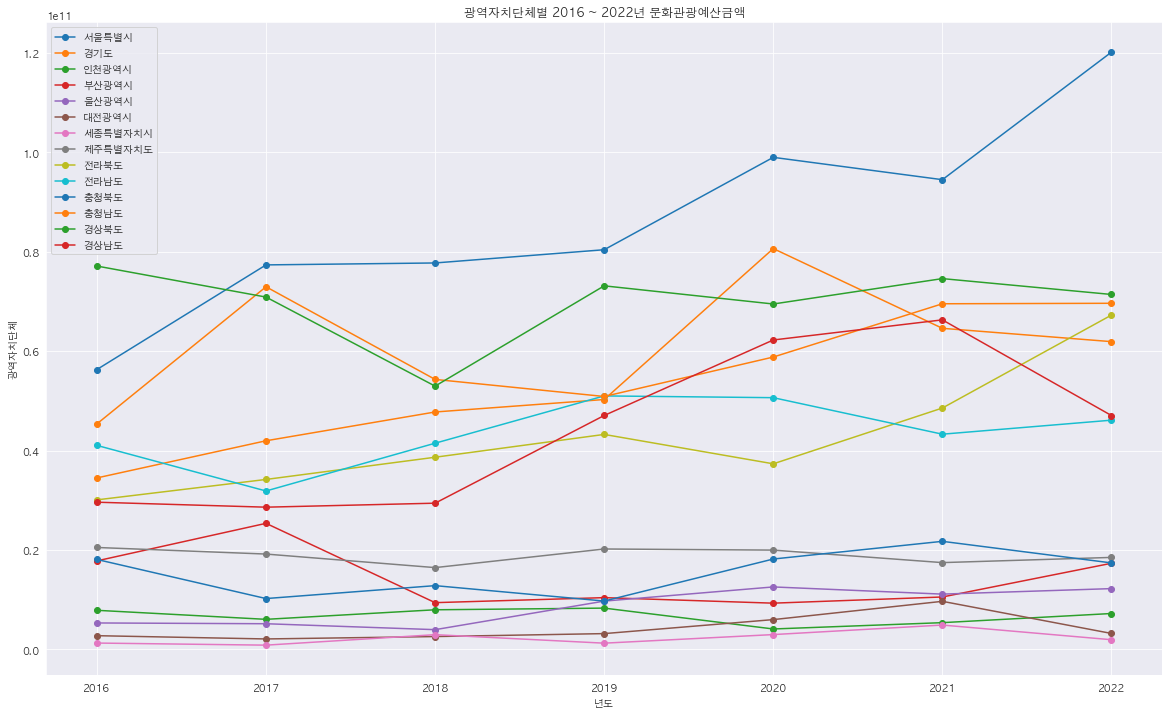

In [34]:
chartdata_1.plot(title='SomeTitie', figsize=(20,12), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel('광역자치단체')
plt.title('광역자치단체별 2016 ~ 2022년 문화관광예산금액')

### 4. ChartData - 2016, 2018, 2020, 2022년의 지자체별 문화관광예산현황 비교

In [35]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(30, 15))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax
# end def MakeBarChart03

In [36]:
chartdata_2 = chartdata_1.T

In [37]:
chartdata_3 = chartdata_2[[2016, 2018, 2020, 2022]]

In [38]:
data = chartdata_3

In [39]:
data

회계년도,2016,2018,2020,2022
서울특별시,5.632196e+10,7.776225e+10,9.901546e+10,1.201865e+11
경기도,3.450902e+10,4.777519e+10,8.065619e+10,6.193113e+10
인천광역시,7.869613e+09,7.975046e+09,4.112777e+09,7.224508e+09
부산광역시,1.781631e+10,9.410063e+09,9.306708e+09,1.733341e+10
울산광역시,5.323460e+09,3.975404e+09,1.257261e+10,1.223476e+10
대전광역시,2.762162e+09,2.586896e+09,5.998566e+09,3.211537e+09
세종특별자치시,1.279812e+09,2.966040e+09,2.984560e+09,1.949688e+09
제주특별자치도,2.051398e+10,1.646130e+10,1.998370e+10,1.851360e+10
전라북도,3.009368e+10,3.867053e+10,3.734750e+10,6.727885e+10
전라남도,4.105088e+10,4.149463e+10,5.065519e+10,4.612785e+10


In [40]:
columns_names = data.columns.tolist()
columns_names

[2016, 2018, 2020, 2022]

In [41]:
chartdata = {}

for row in data.index:
    # data.loc[row])
    # type(row))
    chartdata[row] = data.loc[row].values

chartdata

{'서울특별시': array([5.63219600e+10, 7.77622490e+10, 9.90154600e+10, 1.20186494e+11]),
 '경기도': array([3.4509025e+10, 4.7775186e+10, 8.0656190e+10, 6.1931127e+10]),
 '인천광역시': array([7.869613e+09, 7.975046e+09, 4.112777e+09, 7.224508e+09]),
 '부산광역시': array([1.7816313e+10, 9.4100630e+09, 9.3067080e+09, 1.7333407e+10]),
 '울산광역시': array([5.3234600e+09, 3.9754040e+09, 1.2572611e+10, 1.2234765e+10]),
 '대전광역시': array([2.762162e+09, 2.586896e+09, 5.998566e+09, 3.211537e+09]),
 '세종특별자치시': array([1.279812e+09, 2.966040e+09, 2.984560e+09, 1.949688e+09]),
 '제주특별자치도': array([2.0513983e+10, 1.6461302e+10, 1.9983698e+10, 1.8513595e+10]),
 '전라북도': array([3.0093679e+10, 3.8670529e+10, 3.7347501e+10, 6.7278851e+10]),
 '전라남도': array([4.1050881e+10, 4.1494626e+10, 5.0655189e+10, 4.6127846e+10]),
 '충청북도': array([1.8098950e+10, 1.2833092e+10, 1.8188911e+10, 1.7406307e+10]),
 '충청남도': array([4.5383880e+10, 5.4330734e+10, 5.8831767e+10, 6.9648732e+10]),
 '경상북도': array([7.7141359e+10, 5.2979855e+10, 6.9504855e+10, 7

(<Figure size 2160x1080 with 1 Axes>, <AxesSubplot:>)

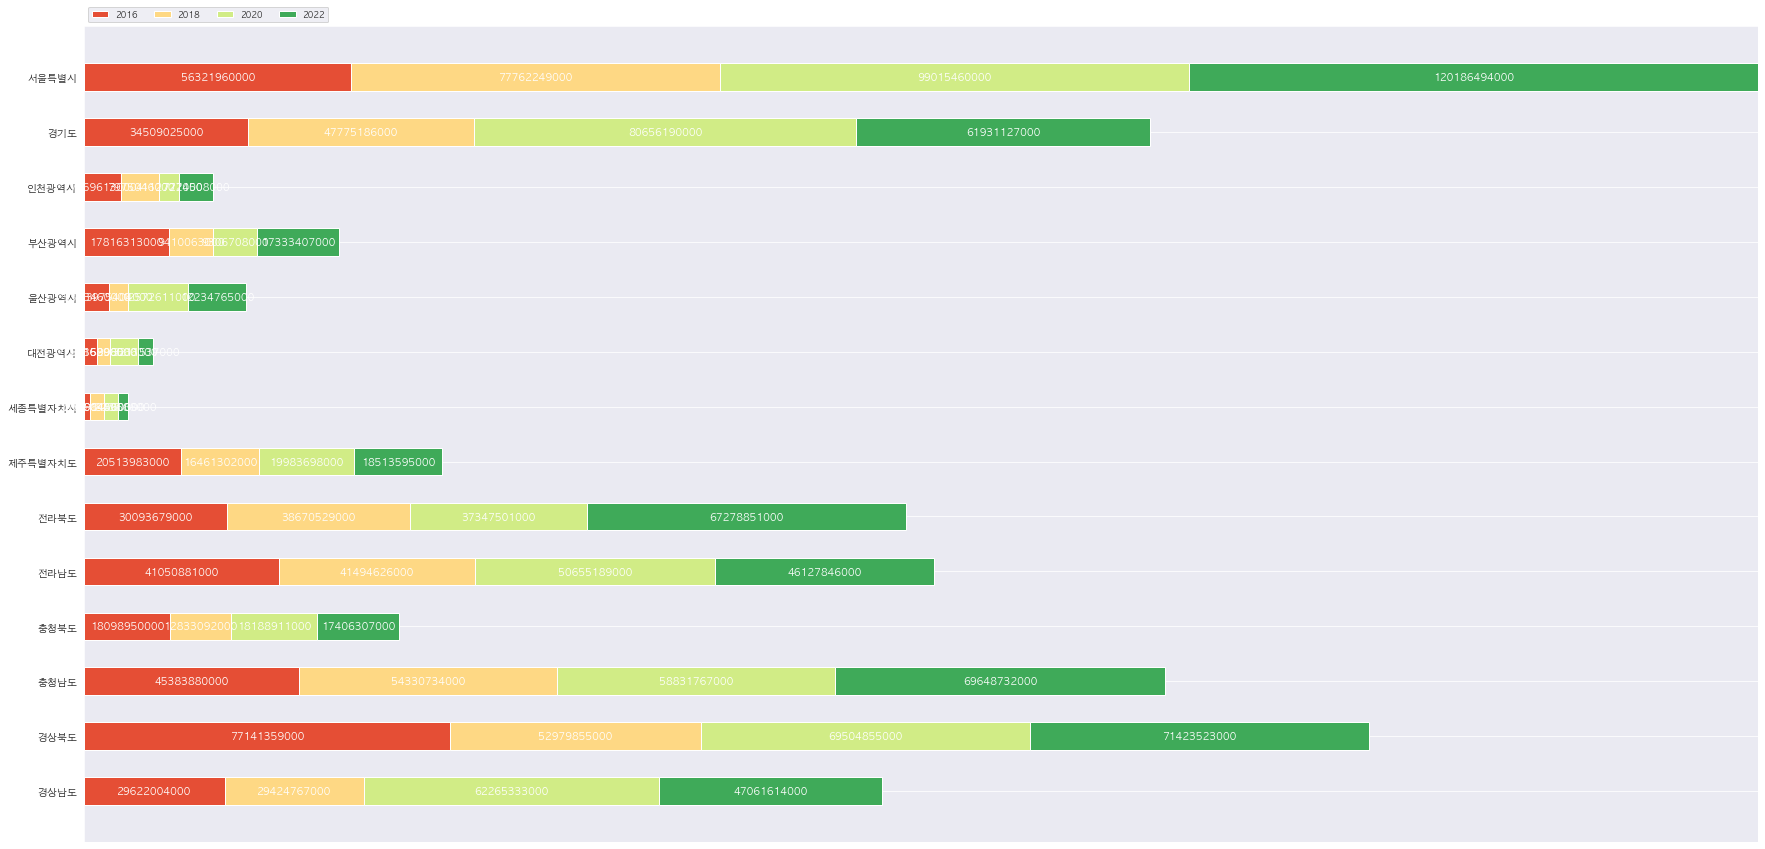

In [42]:
MakeBarChart03(chartdata, columns_names)

## PieChart

### 5. PieChart - 각 지방자치단체별 2020년 문화관광예산금액 

In [43]:
df5 = df[['회계년도', '문화관광예산금액', '행정기관명']]

In [44]:
df5.set_index('회계년도', inplace = True)

In [45]:
print(df5)

          문화관광예산금액      행정기관명
회계년도                         
2016  5.632196e+10      서울특별시
2016  3.850000e+08  서울특별시 종로구
2016  1.384890e+08   서울특별시 중구
2016  2.170000e+07  서울특별시 용산구
2016  4.600000e+07  서울특별시 성동구
...            ...        ...
2022  3.140200e+09   경상남도 산청군
2022  6.944940e+08   경상남도 함양군
2022  3.005200e+08   경상남도 거창군
2022  2.369050e+09   경상남도 합천군
2022  1.851360e+10    제주특별자치도

[1704 rows x 2 columns]


In [46]:
df5

,문화관광예산금액,행정기관명
회계년도,,
2016,5.632196e+10,서울특별시
2016,3.850000e+08,서울특별시 종로구
2016,1.384890e+08,서울특별시 중구
2016,2.170000e+07,서울특별시 용산구
2016,4.600000e+07,서울특별시 성동구
...,...,...
2022,3.140200e+09,경상남도 산청군
2022,6.944940e+08,경상남도 함양군
2022,3.005200e+08,경상남도 거창군


In [47]:
data1 = df5[(df5['행정기관명'] == '서울특별시')]
seoul = data1[['문화관광예산금액']]
seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)

data2 = df5[(df5['행정기관명'] == '경기도')]
ggi = data2[['문화관광예산금액']]
ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)

data3 = df5[(df5['행정기관명'] == '인천광역시')]
ich = data3[['문화관광예산금액']]
ich.rename(columns = {'문화관광예산금액':'인천광역시'}, inplace = True)

data4 = df5[(df5['행정기관명'] == '부산광역시')]
busan = data4[['문화관광예산금액']]
busan.rename(columns = {'문화관광예산금액':'부산광역시'}, inplace = True)

data5 = df5[(df5['행정기관명'] == '울산광역시')]
ulsan = data5[['문화관광예산금액']]
ulsan.rename(columns = {'문화관광예산금액':'울산광역시'}, inplace = True)

data6 = df5[(df5['행정기관명'] == '대전광역시')]
daejeon = data6[['문화관광예산금액']]
daejeon.rename(columns = {'문화관광예산금액':'대전광역시'}, inplace = True)

data7 = df5[(df5['행정기관명'] == '세종특별자치시')]
saejong = data7[['문화관광예산금액']]
saejong.rename(columns = {'문화관광예산금액':'세종특별자치시'}, inplace = True)

data8 = df5[(df5['행정기관명'] == '제주특별자치도')]
jeju = data8[['문화관광예산금액']]
jeju.rename(columns = {'문화관광예산금액':'제주특별자치도'}, inplace = True)

data9 = df5[(df5['행정기관명'] == '전라북도')]
jeonup = data9[['문화관광예산금액']]
jeonup.rename(columns = {'문화관광예산금액':'전라북도'}, inplace = True)

data10 = df5[(df5['행정기관명'] == '전라남도')]
jeondown = data10[['문화관광예산금액']]
jeondown.rename(columns = {'문화관광예산금액':'전라남도'}, inplace = True)

data11 = df5[(df5['행정기관명'] == '충청북도')]
chungup = data11[['문화관광예산금액']]
chungup.rename(columns = {'문화관광예산금액': '충청북도'}, inplace = True)

data12 = df5[(df5['행정기관명'] == '충청남도')]
chungdown = data12[['문화관광예산금액']]
chungdown.rename(columns = {'문화관광예산금액':'충청남도'}, inplace = True)

data13 = df5[(df5['행정기관명'] == '경상북도')]
sangup = data13[['문화관광예산금액']]
sangup.rename(columns = {'문화관광예산금액':'경상북도'}, inplace = True)

data14 = df5[(df5['행정기관명'] == '경상남도')]
sangdown = data14[['문화관광예산금액']]
sangdown.rename(columns = {'문화관광예산금액':'경상남도'}, inplace = True)

/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/3656611595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/3656611595.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/3656611595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [48]:
piedata = pd.concat([seoul, ggi, ich, busan, ulsan, daejeon, saejong,  jeju, jeonup , jeondown ,chungup, chungdown, sangup, sangdown], axis = 1)

In [49]:
piedata

,서울특별시,경기도,인천광역시,부산광역시,울산광역시,대전광역시,세종특별자치시,제주특별자치도,전라북도,전라남도,충청북도,충청남도,경상북도,경상남도
회계년도,,,,,,,,,,,,,,
2016,5.632196e+10,3.450902e+10,7.869613e+09,1.781631e+10,5.323460e+09,2.762162e+09,1.279812e+09,2.051398e+10,3.009368e+10,4.105088e+10,1.809895e+10,4.538388e+10,7.714136e+10,2.962200e+10
2017,7.737316e+10,4.198249e+10,6.052569e+09,2.536883e+10,5.168040e+09,2.106050e+09,8.584000e+08,1.918730e+10,3.420161e+10,3.187910e+10,1.023331e+10,7.297103e+10,7.089874e+10,2.862087e+10
2018,7.776225e+10,4.777519e+10,7.975046e+09,9.410063e+09,3.975404e+09,2.586896e+09,2.966040e+09,1.646130e+10,3.867053e+10,4.149463e+10,1.283309e+10,5.433073e+10,5.297986e+10,2.942477e+10
2019,8.042692e+10,5.028548e+10,8.310851e+09,1.041776e+10,9.719196e+09,3.179646e+09,1.256905e+09,2.020796e+10,4.326080e+10,5.101055e+10,9.733382e+09,5.089513e+10,7.315984e+10,4.707337e+10
2020,9.901546e+10,8.065619e+10,4.112777e+09,9.306708e+09,1.257261e+10,5.998566e+09,2.984560e+09,1.998370e+10,3.734750e+10,5.065519e+10,1.818891e+10,5.883177e+10,6.950486e+10,6.226533e+10
2021,9.451890e+10,6.461281e+10,5.384254e+09,1.055062e+10,1.112559e+10,9.675435e+09,4.902279e+09,1.746706e+10,4.857377e+10,4.330819e+10,2.174778e+10,6.955230e+10,7.461488e+10,6.631225e+10
2022,1.201865e+11,6.193113e+10,7.224508e+09,1.733341e+10,1.223476e+10,3.211537e+09,1.949688e+09,1.851360e+10,6.727885e+10,4.612785e+10,1.740631e+10,6.964873e+10,7.142352e+10,4.706161e+10


In [50]:
piedata2 = piedata.T

In [51]:
piedata2

회계년도,2016,2017,2018,2019,2020,2021,2022
서울특별시,5.632196e+10,7.737316e+10,7.776225e+10,8.042692e+10,9.901546e+10,9.451890e+10,1.201865e+11
경기도,3.450902e+10,4.198249e+10,4.777519e+10,5.028548e+10,8.065619e+10,6.461281e+10,6.193113e+10
인천광역시,7.869613e+09,6.052569e+09,7.975046e+09,8.310851e+09,4.112777e+09,5.384254e+09,7.224508e+09
부산광역시,1.781631e+10,2.536883e+10,9.410063e+09,1.041776e+10,9.306708e+09,1.055062e+10,1.733341e+10
울산광역시,5.323460e+09,5.168040e+09,3.975404e+09,9.719196e+09,1.257261e+10,1.112559e+10,1.223476e+10
대전광역시,2.762162e+09,2.106050e+09,2.586896e+09,3.179646e+09,5.998566e+09,9.675435e+09,3.211537e+09
세종특별자치시,1.279812e+09,8.584000e+08,2.966040e+09,1.256905e+09,2.984560e+09,4.902279e+09,1.949688e+09
제주특별자치도,2.051398e+10,1.918730e+10,1.646130e+10,2.020796e+10,1.998370e+10,1.746706e+10,1.851360e+10
전라북도,3.009368e+10,3.420161e+10,3.867053e+10,4.326080e+10,3.734750e+10,4.857377e+10,6.727885e+10
전라남도,4.105088e+10,3.187910e+10,4.149463e+10,5.101055e+10,5.065519e+10,4.330819e+10,4.612785e+10


In [52]:
piedata3 = piedata2[2020]

In [53]:
print(piedata3)

서울특별시      9.901546e+10
경기도        8.065619e+10
인천광역시      4.112777e+09
부산광역시      9.306708e+09
울산광역시      1.257261e+10
대전광역시      5.998566e+09
세종특별자치시    2.984560e+09
제주특별자치도    1.998370e+10
전라북도       3.734750e+10
전라남도       5.065519e+10
충청북도       1.818891e+10
충청남도       5.883177e+10
경상북도       6.950486e+10
경상남도       6.226533e+10
Name: 2020, dtype: float64


In [54]:
print(type(piedata3))
mylabel = piedata3.index
print(mylabel)

<class 'pandas.core.series.Series'>
Index(['서울특별시', '경기도', '인천광역시', '부산광역시', '울산광역시', '대전광역시', '세종특별자치시',
       '제주특별자치도', '전라북도', '전라남도', '충청북도', '충청남도', '경상북도', '경상남도'],
      dtype='object')


Text(0.5, 1.0, '각 지방자치단체별 2020년 문화관광예산금액')

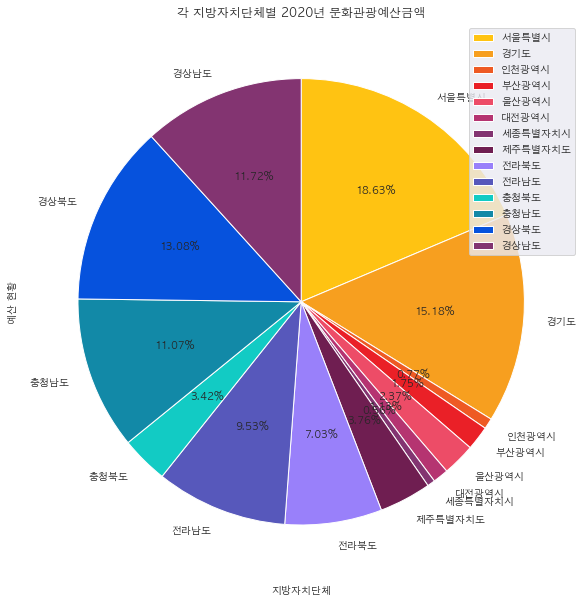

In [55]:
mylabel = piedata3.index

mycolors =['#FFC312', '#F79F1F', '#EE5A24', '#EA2027',
          '#ED4C67', '#B53471', '#833471', '#6F1E51',
          '#9980FA', '#5758BB', '#12CBC4', '#1289A7',
          '#0652DD', '#833471', '#C4E538', '#A3CB38',
          '#009432', '#006266']

plt.figure(figsize = (10, 15))

plt.pie(piedata3, labels=mylabel, shadow=False,  colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False)
plt.grid(True)
plt.legend(loc=1)
plt.legend(loc=1)
plt.xlabel('지방자치단체')
plt.ylabel("예산 현황")
plt.title('각 지방자치단체별 2020년 문화관광예산금액')

## Boxplot 

### 6. Boxplot - 2016년과 2022년 문화관광예산금액

In [56]:
df6 = df[['회계년도', '문화관광예산금액']]

In [57]:
print(df6)

        회계년도      문화관광예산금액
SEQ_NO                    
1       2016  5.632196e+10
2       2016  3.850000e+08
3       2016  1.384890e+08
4       2016  2.170000e+07
5       2016  4.600000e+07
...      ...           ...
1700    2022  3.140200e+09
1701    2022  6.944940e+08
1702    2022  3.005200e+08
1703    2022  2.369050e+09
1704    2022  1.851360e+10

[1704 rows x 2 columns]


In [58]:
frame01 = df6.loc[df6['회계년도'] == 2016, '문화관광예산금액']
frame01.index.name = '2016'

In [59]:
frame02 = df6.loc[df6['회계년도'] == 2022, '문화관광예산금액']
frame02.index.name = '2022'

In [60]:
print('frame01')
print(frame01)
print()
print('frame02')
print(frame02)

frame01
2016
1      5.632196e+10
2      3.850000e+08
3      1.384890e+08
4      2.170000e+07
5      4.600000e+07
           ...     
239    1.204330e+09
240    1.163180e+09
241    4.058540e+08
242    2.510540e+09
243    2.051398e+10
Name: 문화관광예산금액, Length: 243, dtype: float64

frame02
2022
1462    1.201865e+11
1463    4.907220e+08
1464    5.582670e+08
1465    2.525380e+08
1466    3.572370e+08
            ...     
1700    3.140200e+09
1701    6.944940e+08
1702    3.005200e+08
1703    2.369050e+09
1704    1.851360e+10
Name: 문화관광예산금액, Length: 243, dtype: float64


In [61]:
chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)

chartdata
[array([5.6321960e+10, 3.8500000e+08, 1.3848900e+08, 2.1700000e+07,
       4.6000000e+07, 5.2928400e+08, 0.0000000e+00, 1.4758000e+08,
       3.6696000e+08, 3.4920000e+08, 1.2000000e+06, 0.0000000e+00,
       0.0000000e+00, 9.4680000e+07, 2.4000000e+07, 6.7352000e+07,
       2.9815300e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.1800000e+08, 1.5300000e+08, 0.0000000e+00, 1.0000000e+09,
       1.5942800e+08, 1.0256600e+08, 1.7816313e+10, 0.0000000e+00,
       5.5500000e+07, 5.3530000e+07, 8.7920000e+07, 3.6691000e+07,
       9.9795000e+07, 4.2370000e+07, 6.8870000e+07, 2.8704000e+07,
       1.4135500e+08, 1.0145680e+09, 4.4460000e+07, 1.6350000e+07,
       7.6905000e+07, 4.6956000e+07, 3.5181200e+08, 6.8842350e+09,
       3.1113200e+08, 9.5082000e+08, 0.0000000e+00, 0.0000000e+00,
       5.0462000e+07, 9.5220000e+07, 9.0695000e+08, 1.6635940e+09,
       7.8696130e+09, 1.4381000e+08, 3.3582300e+08, 1.1009000e+08,
       2.1570600e+08, 4.6319000e+07, 1.6018100e+08,

boxPlotExam_01.png 파일이 저장되었습니다.
finished


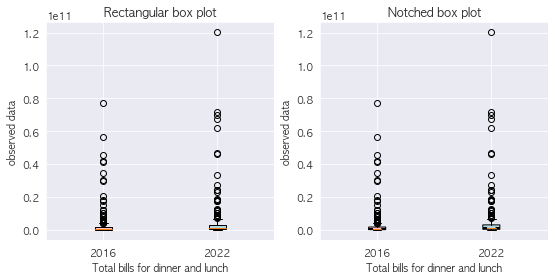

In [62]:
xtick_label = ['2016', '2022'] # x 축을 위한 레이블

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape ### 노치 추가 
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

colors = ['pink', 'lightblue'] # fill with colors
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)  # y축 그리드라인
    ax.set_xlabel('Total bills for dinner and lunch')
    ax.set_ylabel('observed data')

cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'boxPlotExam'

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

print('finished')

### 7. Boxplot - 2018년과 2020년 1인당문화관광예산금액

In [63]:
df7 = df[['회계년도', '1인당문화관광예산금액']]

In [64]:
print(df7)

        회계년도  1인당문화관광예산금액
SEQ_NO                   
1       2016       5714.0
2       2016       2521.0
3       2016       1106.0
4       2016         94.0
5       2016        154.0
...      ...          ...
1700    2022      86991.0
1701    2022      17258.0
1702    2022       4747.0
1703    2022      49328.0
1704    2022      28855.0

[1704 rows x 2 columns]


In [65]:
frame01 = df7.loc[df7['회계년도'] == 2018, '1인당문화관광예산금액']
frame01.index.name = '2018'

In [66]:
frame02 = df7.loc[df7['회계년도'] == 2020, '1인당문화관광예산금액']
frame02.index.name = '2020'

In [67]:
print('frame01')
print(frame01)
print()
print('frame02')
print(frame02)

frame01
2018
490     7889.0
491      718.0
492     3122.0
493      243.0
494      215.0
        ...   
728    25491.0
729    33795.0
730     6299.0
731    39397.0
732    25657.0
Name: 1인당문화관광예산금액, Length: 243, dtype: float64

frame02
2020
976     10045.0
977      1660.0
978      2183.0
979       298.0
980       217.0
         ...   
1214    29031.0
1215    53672.0
1216     8117.0
1217    53995.0
1218    31147.0
Name: 1인당문화관광예산금액, Length: 243, dtype: float64


In [68]:
chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)

chartdata
[array([7.88900e+03, 7.18000e+02, 3.12200e+03, 2.43000e+02, 2.15000e+02,
       3.99000e+02, 4.52000e+02, 6.50000e+02, 5.12000e+02, 1.01600e+03,
       3.49000e+02, 4.97000e+02, 7.28000e+02, 5.20000e+01, 1.82000e+02,
       2.69000e+02, 9.18000e+02, 0.00000e+00, 1.18100e+03, 0.00000e+00,
       5.14000e+02, 1.46000e+02, 9.00000e+00, 1.27000e+02, 3.98000e+02,
       3.35000e+02, 2.69000e+03, 0.00000e+00, 2.56000e+02, 2.84000e+02,
       1.41200e+03, 7.51000e+02, 4.34000e+02, 0.00000e+00, 3.64000e+02,
       1.26000e+02, 3.70000e+02, 4.60000e+03, 4.43000e+02, 6.00000e+01,
       7.61000e+02, 6.73000e+02, 2.71800e+03, 2.54800e+03, 3.58500e+03,
       6.12000e+03, 0.00000e+00, 8.22000e+02, 1.83000e+02, 2.47000e+02,
       5.00000e+00, 5.29100e+03, 2.71000e+03, 6.30200e+03, 2.24400e+03,
       3.05000e+02, 2.24300e+03, 8.80000e+01, 1.10000e+02, 5.80000e+01,
       9.73000e+02, 8.04360e+04, 1.46410e+04, 1.56120e+04, 1.53000e+02,
       2.60000e+01, 6.31700e+03, 3.68000e+02, 1.63800

boxPlotExam_01.png 파일이 저장되었습니다.
finished


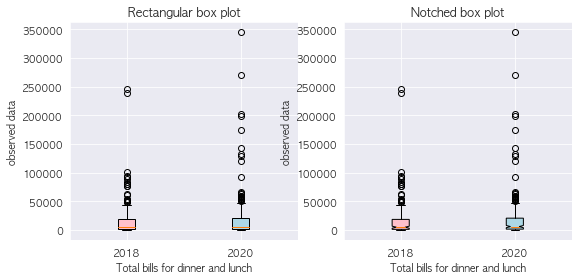

In [69]:
xtick_label = ['2018', '2020'] # x 축을 위한 레이블

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape ### 노치 추가 
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')

colors = ['pink', 'lightblue'] # fill with colors
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)  # y축 그리드라인
    ax.set_xlabel('Total bills for dinner and lunch')
    ax.set_ylabel('observed data')

cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'boxPlotExam'

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

print('finished')

## Histogram

### 8. Histogram - 문화관광예산금액 히스토그램

In [70]:
df8 = df
num_bins = 30

<class 'pandas.core.series.Series'>
mu : 3776337373.8977075
sigma : 10737714868.262936


/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2683585016.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/2683585016.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(savefile, dpi=400)


boxPlotExam_02.png 파일이 저장되었습니다.


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


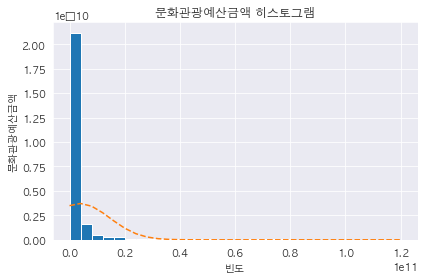

In [71]:
fig, ax = plt.subplots() # 괄호 안 없음 그림 1개 그린다 

x = df8['문화관광예산금액'] # Series
print(type(x))

n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('문화관광예산금액 히스토그램')
ax.set_xlabel('빈도')
ax.set_ylabel('문화관광예산금액')

import numpy as np

mu = x.mean()  # 평균
print('mu :', mu)

sigma = x.std() # 표준 편차
print('sigma :', sigma)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))  # 확률 분포 그래는 수식이다. 
ax.plot(bins, y, '--')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

### 9. Histogram - 1인당 문화관광예산금액 히스토그램

<class 'pandas.core.series.Series'>
mu : 17638.74603174603
sigma : 34411.92734149947


/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/1101709076.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/1101709076.py:26: UserWarning: Glyph 3 () missing from current font.
  fig.tight_layout()
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/1101709076.py:30: UserWarning: Glyph 3 () missing from current font.
  plt.savefig(savefile, dpi=400)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2036/1101709076.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(savefile, dpi=400)


boxPlotExam_03.png 파일이 저장되었습니다.


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


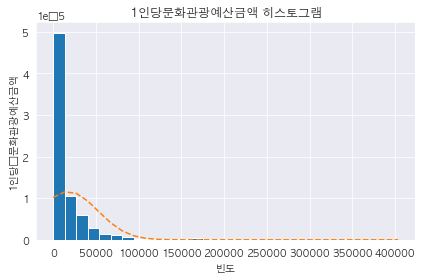

In [72]:
plt.rc('font', family='AppleGothic')
fig, ax = plt.subplots() # 괄호 안 없음 그림 1개 그린다

x = df['1인당문화관광예산금액'] # Series
print(type(x))

n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('1인당문화관광예산금액 히스토그램')
ax.set_xlabel('빈도')
ax.set_ylabel('1인당문화관광예산금액')

import numpy as np

mu = x.mean()  # 평균
print('mu :', mu)

sigma = x.std() # 표준 편차
print('sigma :', sigma)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))  # 확률 분포 그래는 수식이다. 
ax.plot(bins, y, '--')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

## Scatterplot

### 10. Scatterplot - 문화관광예산금액과 1인당 문화관광예산금액 산점도

In [73]:
xdata = df.loc[:, ['문화관광예산금액']]

In [74]:
ydata = df.loc[:, ['1인당문화관광예산금액']]

In [75]:
print(xdata)

            문화관광예산금액
SEQ_NO              
1       5.632196e+10
2       3.850000e+08
3       1.384890e+08
4       2.170000e+07
5       4.600000e+07
...              ...
1700    3.140200e+09
1701    6.944940e+08
1702    3.005200e+08
1703    2.369050e+09
1704    1.851360e+10

[1704 rows x 1 columns]


In [76]:
print(ydata)

        1인당문화관광예산금액
SEQ_NO             
1            5714.0
2            2521.0
3            1106.0
4              94.0
5             154.0
...             ...
1700        86991.0
1701        17258.0
1702         4747.0
1703        49328.0
1704        28855.0

[1704 rows x 1 columns]


### 11. Scatterplot -  년도별 문화관광예산금액과 1인당 문화관광예산금액 산점도

In [77]:
mycolors =['#FFC312', '#F79F1F', '#EE5A24', '#EA2027',
          '#ED4C67', '#B53471', '#833471']

In [78]:
label_dict = {2016:'2016년', 2017:'2017년', 2018:'2018년', 2019:'2019년',
              2020:'2020년', 2021:'2021년', 2022:'2022년', }

In [79]:
labels = df['회계년도'].unique()

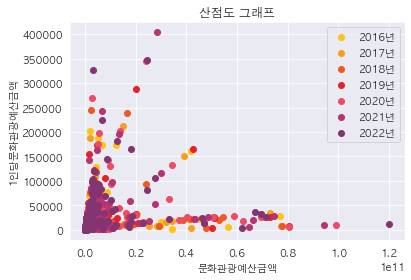

In [80]:
plt.figure()

idx = 0 # 색상 구분을 위한 카운터 변수.
for finditem in labels:

    xdata = df.loc[df['회계년도'] == finditem, '문화관광예산금액']
    ydata = df.loc[df['회계년도'] == finditem, '1인당문화관광예산금액']
    plt.plot(xdata, ydata, color=mycolors[idx], marker='o', linestyle='None', label=label_dict[finditem])
    idx += 1

plt.legend()
plt.xlabel("문화관광예산금액")
plt.ylabel("1인당문화관광예산금액")
plt.title("산점도 그래프")
plt.grid(True)

#### 12. Scatterplot - 문화관광예산금액과 1인당 문화관광예산금액 Rug plot과 산점도


In [81]:
import seaborn as sns

boxPlotExam_04.png 파일이 저장되었습니다.


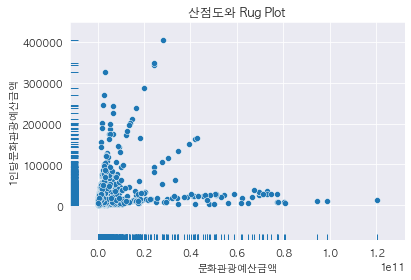

In [82]:
ax = plt.subplots()
sns.scatterplot(data=df, x='문화관광예산금액', y='1인당문화관광예산금액')
ax = sns.rugplot(data=df, x='문화관광예산금액', y='1인당문화관광예산금액')
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('문화관광예산금액')
ax.set_ylabel('1인당문화관광예산금액')
FileSave()

#### 13. countplot - 연도에 따른 countplot




boxPlotExam_05.png 파일이 저장되었습니다.


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


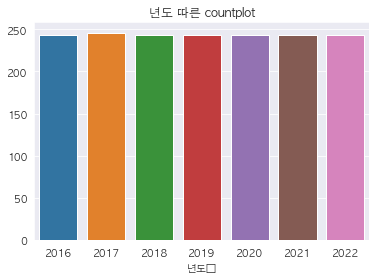

<Figure size 432x288 with 0 Axes>

In [83]:
ax = sns.countplot(x="회계년도", data=df)
plt.figure()
ax.set_title('년도 따른 countplot')
ax.set_xlabel('년도')
ax.set_ylabel('')
FileSave()

#### 14. jointplot - 문화관광예산금액과 1인당문화관광예산금액 jointplot

boxPlotExam_06.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

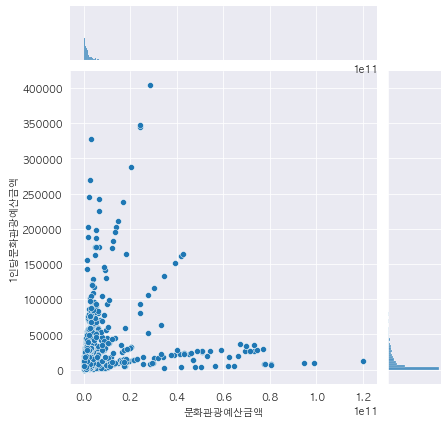

In [84]:
plt.figure()
ax = sns.jointplot(x="문화관광예산금액", y='1인당문화관광예산금액', data=df) # 도수까지 같이 보여준다 
FileSave()

## Pairplot

### 15. pairplot - pairplot 제작

boxPlotExam_07.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

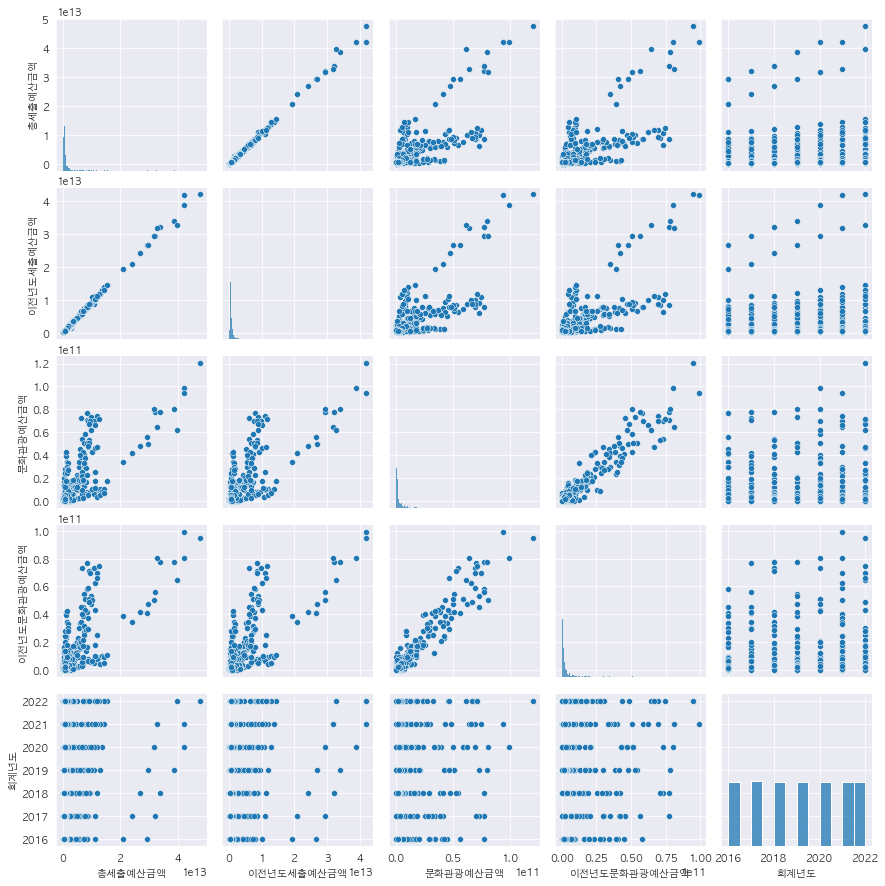

In [85]:
plt.figure()
newdf = df.loc[:, ['총세출예산금액', '이전년도세출예산금액', '문화관광예산금액', '이전년도문화관광예산금액', '회계년도']]
ax = sns.pairplot(data=newdf)
FileSave()

boxPlotExam_08.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

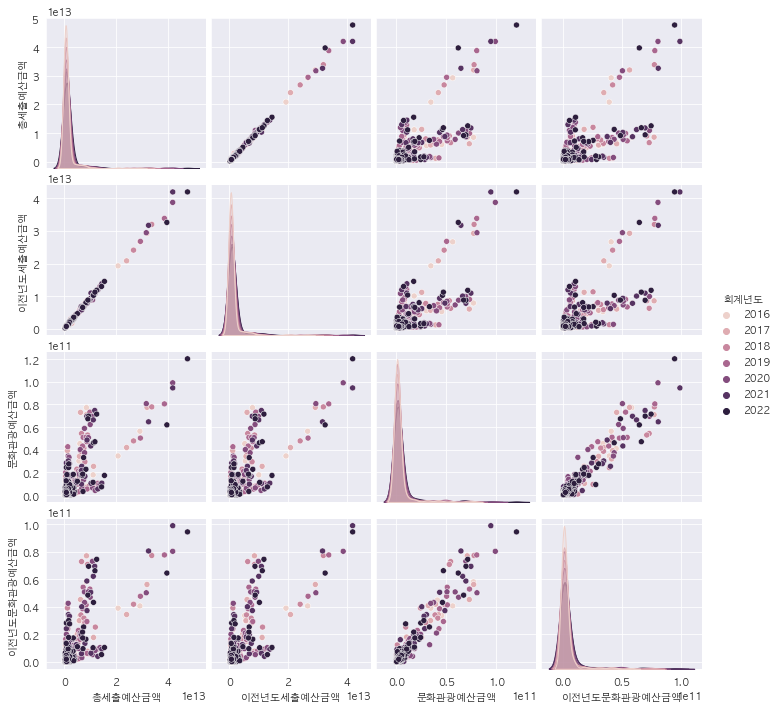

In [86]:
plt.figure()
ax = sns.pairplot(data=newdf, hue="회계년도" )
FileSave()

## HeatMap

### 16. Heatmap 제작

In [87]:
## 히트맵 무엇으로 제작할지 더 고민해보기...